<a href="https://colab.research.google.com/github/it-ces/PUBLIC-AI/blob/main/short-labs-pandas/Hanushek_hypothesis(Ai_page).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Iván Andrés Trujillo Abella
# ivantrujillo1229@gmail.com

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url_test = "https://raw.githubusercontent.com/it-ces/Datasets/main/icfesSaber11_20202.csv"
url_gdps = "https://raw.githubusercontent.com/it-ces/Datasets/main/Dpto-gdps.csv"

In [4]:
df_test = pd.read_csv(url_test)
df_gdps = pd.read_csv(url_gdps)

In [5]:
df_test.columns

Index(['Unnamed: 0', 'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO',
       'COLE_COD_DEPTO_UBICACION', 'COLE_DEPTO_UBICACION', 'PUNT_MATEMATICAS',
       'PUNT_GLOBAL'],
      dtype='object')

In [6]:
df_test['COLE_DEPTO_UBICACION'].nunique()

33

In [7]:
df_test['dpto_score'] = df_test.groupby(by=['COLE_DEPTO_UBICACION'])['PUNT_MATEMATICAS'].transform('mean')

In [8]:
df_test = df_test[['COLE_DEPTO_UBICACION', 'dpto_score']]

In [9]:
df_test = df_test[-df_test.duplicated(subset=['COLE_DEPTO_UBICACION'])]

In [10]:
df_test

,COLE_DEPTO_UBICACION,dpto_score
0,CALDAS,51.013277
1,BOGOTÁ,54.910477
4,TOLIMA,49.570133
5,CESAR,49.316756
6,ANTIOQUIA,49.638535
9,CAUCA,47.442699
10,CUNDINAMARCA,53.431499
13,ATLANTICO,50.190611
14,META,52.188380
15,RISARALDA,51.589427


In [11]:
df_gdps['dpto-gdp-mean'] = df_gdps[['2021p', '2022p']].mean(axis=1)

In [12]:
df_gdps = df_gdps[['DEPARTAMENTOS', 'dpto-gdp-mean']]

In [13]:
df_gdps

,DEPARTAMENTOS,dpto-gdp-mean
0,COLOMBIA,2.588502e+07
1,Amazonas,1.192556e+07
2,Antioquia,2.887136e+07
3,Arauca,2.555778e+07
4,Atlántico,2.110325e+07
5,Bogotá D.C.,4.234105e+07
6,Bolívar,2.118528e+07
7,Boyacá,2.752688e+07
8,Caldas,2.107601e+07
9,Caquetá,1.231461e+07


In [14]:
names_test = df_test['COLE_DEPTO_UBICACION'].unique()
names_gdps = df_gdps['DEPARTAMENTOS'].unique()

In [15]:
print(set(names_test) - set(names_gdps))
print(set(names_gdps)- set(names_test))

{'CORDOBA', 'CALDAS', 'CESAR', 'TOLIMA', 'VALLE', 'CUNDINAMARCA', 'PUTUMAYO', 'BOGOTÁ', 'ARAUCA', 'CHOCO', 'VAUPES', 'VICHADA', 'CASANARE', 'AMAZONAS', 'QUINDIO', 'SUCRE', 'CAUCA', 'META', 'CAQUETA', 'NARIÑO', 'NORTE SANTANDER', 'SAN ANDRES', 'HUILA', 'ANTIOQUIA', 'ATLANTICO', 'RISARALDA', 'MAGDALENA', 'BOYACA', 'BOLIVAR', 'GUAINIA', 'LA GUAJIRA', 'GUAVIARE', 'SANTANDER'}
{'Vaupés', 'Bolívar', 'Boyacá', 'Casanare', 'Valle del Cauca', 'Norte de Santander', 'Meta', 'Caquetá', 'COLOMBIA', 'Amazonas', 'Cesar', 'Risaralda', 'Atlántico', 'Magdalena', 'Santander', 'San Andrés, Providencia y Santa Catalina (Archipiélago)', 'Cauca', 'La Guajira', 'Arauca', 'Putumayo', 'Bogotá D.C.', 'Caldas', 'Córdoba', 'Cundinamarca', 'Antioquia', 'Vichada', 'Quindío', 'Chocó', 'Guaviare', 'Sucre', 'Huila', 'Nariño', 'Tolima', 'Guainía'}


In [16]:
def clean_str(string):
  string = string.upper()
  string = string.replace("Á", "A")
  string = string.replace("É", "E")
  string = string.replace("Í", "I")
  string = string.replace("Ó", "O")
  string = string.replace("Ú", "U")
  return string

In [17]:
df_gdps['DEPARTAMENTOS'] = df_gdps['DEPARTAMENTOS'].apply(lambda x : clean_str(x))

In [18]:
names_test = df_test['COLE_DEPTO_UBICACION'].unique()
names_gdps = df_gdps['DEPARTAMENTOS'].unique()
print(set(names_test) - set(names_gdps))
print(set(names_gdps)- set(names_test))

{'BOGOTÁ', 'VALLE', 'SAN ANDRES', 'NORTE SANTANDER'}
{'COLOMBIA', 'SAN ANDRES, PROVIDENCIA Y SANTA CATALINA (ARCHIPIELAGO)', 'VALLE DEL CAUCA', 'NORTE DE SANTANDER', 'BOGOTA D.C.'}


In [19]:
book = {'BOGOTA D.C.':'BOGOTÁ',
        'VALLE DEL CAUCA':'VALLE',
        'NORTE DE SANTANDER': 'NORTE SANTANDER',
        'SAN ANDRES, PROVIDENCIA Y SANTA CATALINA (ARCHIPIELAGO)':'SAN ANDRES'}

In [20]:
df_gdps.replace(book, inplace=True)

In [29]:
names_test = df_test['COLE_DEPTO_UBICACION'].unique()
names_gdps = df_gdps['DEPARTAMENTOS'].unique()
print(set(names_test) - set(names_gdps))
print(set(names_gdps)- set(names_test))

set()
{'COLOMBIA'}


In [22]:
df_gdps.columns

Index(['DEPARTAMENTOS', 'dpto-gdp-mean'], dtype='object')

In [33]:
df_test.columns

Index(['COLE_DEPTO_UBICACION', 'dpto_score'], dtype='object')

In [39]:
full = df_gdps.merge(df_test,left_on = 'DEPARTAMENTOS', right_on='COLE_DEPTO_UBICACION',
              suffixes=('', 'duplicated'))

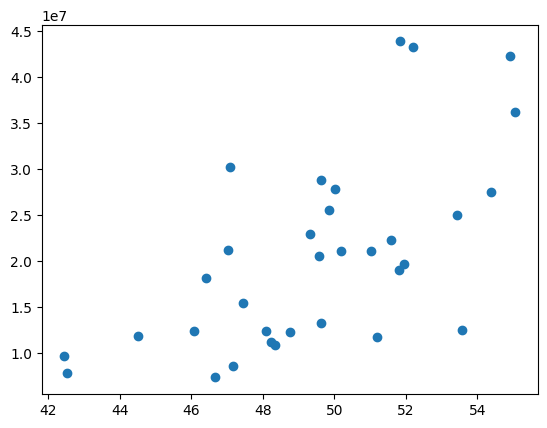

In [40]:
plt.scatter(full['dpto_score'], full['dpto-gdp-mean'])

In [45]:
full[['dpto_score', 'dpto-gdp-mean' ]].corr(method='pearson')

,dpto_score,dpto-gdp-mean
dpto_score,1.000000,0.628223
dpto-gdp-mean,0.628223,1.000000


In [44]:
full[['dpto_score', 'dpto-gdp-mean' ]].corr(method='spearman')

,dpto_score,dpto-gdp-mean
dpto_score,1.000000,0.636029
dpto-gdp-mean,0.636029,1.000000


In [46]:
import statsmodels.formula.api as smf

In [47]:
full.columns

Index(['DEPARTAMENTOS', 'dpto-gdp-mean', 'COLE_DEPTO_UBICACION', 'dpto_score'], dtype='object')

In [55]:
full.rename(columns = {'dpto-gdp-mean':'gdp'}, inplace=True)

In [56]:
full

,DEPARTAMENTOS,gdp,COLE_DEPTO_UBICACION,dpto_score
0,AMAZONAS,1.192556e+07,AMAZONAS,44.503175
1,ANTIOQUIA,2.887136e+07,ANTIOQUIA,49.638535
2,ARAUCA,2.555778e+07,ARAUCA,49.835681
3,ATLANTICO,2.110325e+07,ATLANTICO,50.190611
4,BOGOTÁ,4.234105e+07,BOGOTÁ,54.910477
5,BOLIVAR,2.118528e+07,BOLIVAR,47.037290
6,BOYACA,2.752688e+07,BOYACA,54.366490
7,CALDAS,2.107601e+07,CALDAS,51.013277
8,CAQUETA,1.231461e+07,CAQUETA,48.762942
9,CASANARE,4.390706e+07,CASANARE,51.844047


In [58]:
res = smf.ols('gdp ~ dpto_score', data=full).fit()

In [60]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     20.21
Date:                Wed, 14 May 2025   Prob (F-statistic):           9.06e-05
Time:                        14:28:50   Log-Likelihood:                -570.85
No. Observations:                  33   AIC:                             1146.
Df Residuals:                      31   BIC:                             1149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.901e+07   2.22e+07     -3.564      0.0